# Solving an Elliptic PDE using Deep Ritz Method

In [1]:
from  DRM_Solver_Generalized import DRM_Solver_Generalized
from pde_residuals import *
from utility_functions import *
from visualize import *

## Example for 1D poisson Equation using Deep Ritz Method

### Parameters for 1D poissons Equation

In [2]:
print("Example for 1D poisson Equation using Deep Ritz Method")
spatial_dim_1d = 1
lx_1d = 1.0
domain_bound_1d = [[0.0, lx_1d]]
poisson_pde_params_1d = {'f_func': f_func_1d}
num_pde_points = 5000
num_bc_points = 1000
epochs = 4500
learning_rate = 1e-3
layer_sizes = [32,32,32,32]


Example for 1D poisson Equation using Deep Ritz Method


In [3]:
poisson_solver = DRM_Solver_Generalized(spatial_dim_1d, layer_sizes)
print("Created the Deep Ritz Neural Model for 1D Poisson Equation ")

Using device: mps
Created the Deep Ritz Neural Model for 1D Poisson Equation 


In [4]:
poisson_solver.train(pde_residual_func=poisson_energy_functional,
                         pde_parameters=poisson_pde_params_1d,
                         domain_bound=domain_bound_1d,
                         boundary_condition_func=bc_1d_poisson,
                         num_pde_points=num_pde_points,
                         num_bc_points=num_bc_points,
                         epochs=epochs, learning_rate=learning_rate
                         )


 --- Training Loop for DGM for 1 spatial dimensional pde on mps
Epoch 100/4500: Total Loss=3.3963e-01, TOTAL Loss=3.3963e-01, FUNCTIONAL Loss=3.3032e-01, BC Loss=9.3051e-06
Epoch 200/4500: Total Loss=3.6314e-01, TOTAL Loss=3.6314e-01, FUNCTIONAL Loss=3.6136e-01, BC Loss=1.7847e-06
Epoch 300/4500: Total Loss=3.0915e-01, TOTAL Loss=3.0915e-01, FUNCTIONAL Loss=3.0727e-01, BC Loss=1.8823e-06
Epoch 400/4500: Total Loss=2.9679e-01, TOTAL Loss=2.9679e-01, FUNCTIONAL Loss=2.9487e-01, BC Loss=1.9216e-06
Epoch 500/4500: Total Loss=2.7031e-01, TOTAL Loss=2.7031e-01, FUNCTIONAL Loss=2.6849e-01, BC Loss=1.8223e-06
Epoch 600/4500: Total Loss=2.5349e-01, TOTAL Loss=2.5349e-01, FUNCTIONAL Loss=2.5165e-01, BC Loss=1.8398e-06
Epoch 700/4500: Total Loss=2.0101e-01, TOTAL Loss=2.0101e-01, FUNCTIONAL Loss=1.9914e-01, BC Loss=1.8741e-06
Epoch 800/4500: Total Loss=1.8464e-01, TOTAL Loss=1.8464e-01, FUNCTIONAL Loss=1.8281e-01, BC Loss=1.8315e-06
Epoch 900/4500: Total Loss=1.9055e-01, TOTAL Loss=1.9055e-01, F

## Visualizing the Poisson Equation Solution in 1D

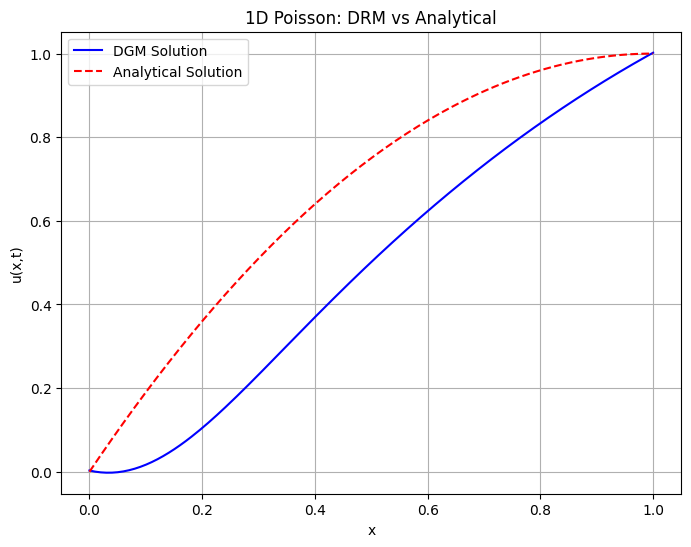

In [5]:
plot_1d_solution(poisson_solver, domain_bound_1d,
                     analytical_solution_func=analytical_solution_1d_poisson,
                     plot_params={'title': "1D Poisson: DRM vs Analytical"})

## Example for 2D poisson Equation using Deep Ritz Method


### Parameters for 2D poissons Equation


In [6]:
spatial_dim_2d = 2
Lx_2d, Ly_2d = 1.0, 1.0
domain_bounds_2d = [[0.0, Lx_2d], [0.0, Ly_2d]]
num_pde_points = 10000
num_bc_points = 4000
epochs = 30000
learning_rate = 1e-3
layer_sizes = [64, 64, 64, 32]
poisson_pde_params_2d = {'f_func': f_func_2d}

In [7]:
poisson_solver_2d = DRM_Solver_Generalized(spatial_dim_2d, layer_sizes=layer_sizes)
print("Created the Deep Ritz Neural Model for 2D Poisson Equation ")

Using device: mps
Created the Deep Ritz Neural Model for 2D Poisson Equation 


In [8]:
poisson_solver_2d.train(pde_residual_func=poisson_energy_functional,
                            pde_parameters=poisson_pde_params_2d,
                            domain_bound=domain_bounds_2d,
                            boundary_condition_func=bc_2d_poisson,
                            num_pde_points=num_pde_points, num_bc_points=num_bc_points,
                            epochs=epochs, learning_rate=learning_rate)


 --- Training Loop for DGM for 2 spatial dimensional pde on mps
Epoch 100/30000: Total Loss=1.7088e-03, TOTAL Loss=1.7088e-03, FUNCTIONAL Loss=7.7408e-04, BC Loss=9.3470e-07
Epoch 200/30000: Total Loss=1.7583e-03, TOTAL Loss=1.7583e-03, FUNCTIONAL Loss=1.2323e-03, BC Loss=5.2603e-07
Epoch 300/30000: Total Loss=1.0482e-03, TOTAL Loss=1.0482e-03, FUNCTIONAL Loss=7.5081e-04, BC Loss=2.9738e-07
Epoch 400/30000: Total Loss=2.2745e-04, TOTAL Loss=2.2745e-04, FUNCTIONAL Loss=6.3654e-06, BC Loss=2.2109e-07
Epoch 500/30000: Total Loss=6.4884e-04, TOTAL Loss=6.4884e-04, FUNCTIONAL Loss=4.5957e-04, BC Loss=1.8926e-07
Epoch 600/30000: Total Loss=4.5504e-04, TOTAL Loss=4.5504e-04, FUNCTIONAL Loss=2.5414e-04, BC Loss=2.0090e-07
Epoch 700/30000: Total Loss=4.1479e-03, TOTAL Loss=4.1479e-03, FUNCTIONAL Loss=3.9580e-03, BC Loss=1.8991e-07
Epoch 800/30000: Total Loss=-6.0921e-04, TOTAL Loss=-6.0921e-04, FUNCTIONAL Loss=-7.8047e-04, BC Loss=1.7126e-07
Epoch 900/30000: Total Loss=-1.4545e-03, TOTAL Loss=

## Visualizing the Poisson Equation Solution in 2D

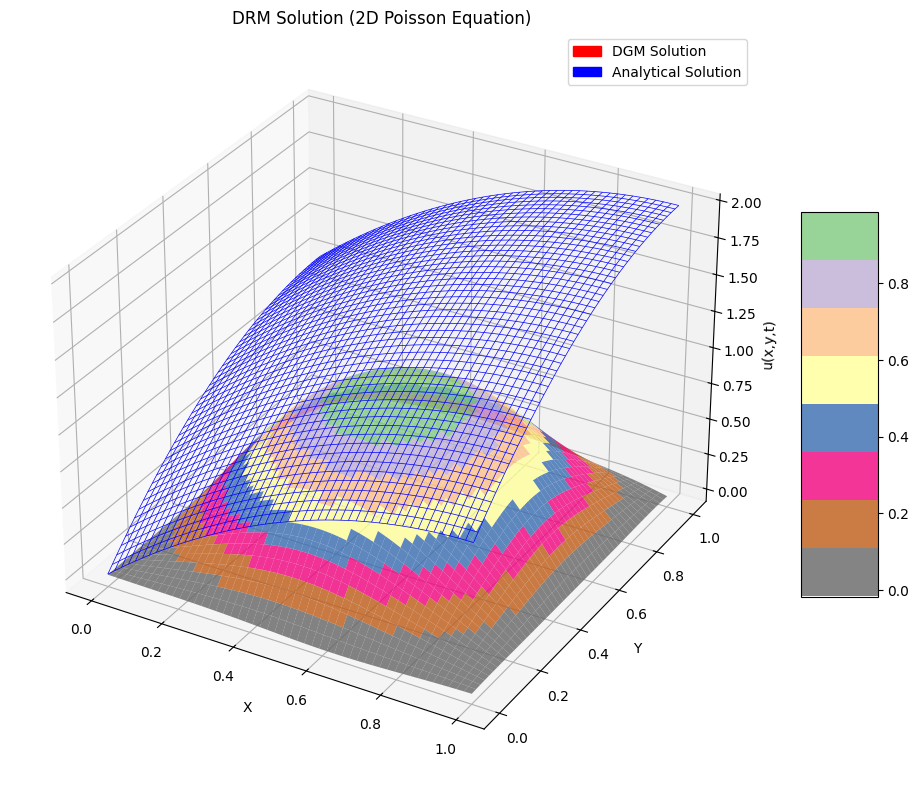

In [9]:
plot_2d_solution_surface(poisson_solver_2d, domain_bounds=domain_bounds_2d,
                             analytical_solution_func=analytical_solution_2d_poisson,
                             plot_params={'title': "DRM Solution (2D Poisson Equation)"})

/Users/abhijithsai/PycharmProjects/deep_galerkin_impl/visualize.py:308: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


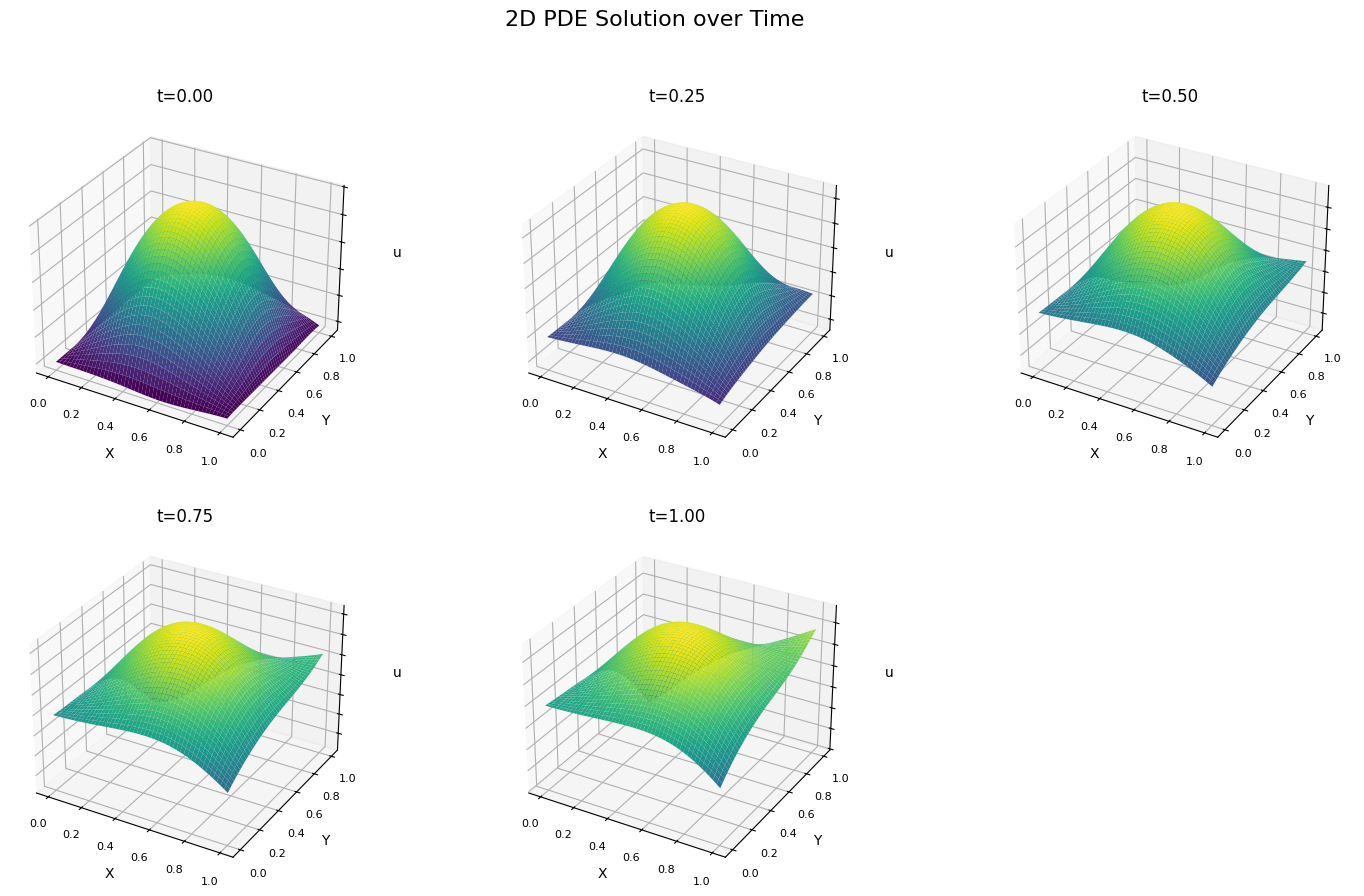

In [10]:
time_slices = [0.0, 0.25, 0.5, 0.75, 1.0]
plot_2d_solution_over_time_subplots(poisson_solver_2d, domain_bounds=domain_bounds_2d, time_slices=time_slices)


## Example for 3D poisson Equation using Deep Ritz Method


### Parameters for 3D poissons Equation


In [11]:
spatial_dim_3d = 3
Lx_3d, Ly_3d, Lz_3d = 1.0, 1.0, 1.0
domain_bounds_3d = [[0.0, Lx_3d], [0.0, Ly_3d], [0.0, Lz_3d]]
num_pde_points = 15000
num_bc_points = 6000
epochs = 45000
learning_rate = 1e-3
layer_sizes = [128,128,128,64,32]
poisson_pde_params_3d = {'f_func': f_func_3d}


In [12]:
poisson_solver_3d = DRM_Solver_Generalized(spatial_dim_3d, layer_sizes=layer_sizes)
print("Created the Deep Ritz Neural Model for 3D Poisson Equation ")

Using device: mps
Created the Deep Ritz Neural Model for 3D Poisson Equation 


In [13]:
poisson_solver_3d.train(pde_residual_func=poisson_energy_functional,
                            pde_parameters=poisson_pde_params_3d,
                            domain_bound=domain_bounds_3d,
                            boundary_condition_func=bc_3d_poisson,
                            num_pde_points=num_pde_points, num_bc_points=num_bc_points,
                            epochs=epochs, learning_rate=learning_rate)


 --- Training Loop for DGM for 3 spatial dimensional pde on mps
Epoch 100/45000: Total Loss=1.1222e-04, TOTAL Loss=1.1222e-04, FUNCTIONAL Loss=-4.1921e-05, BC Loss=1.5414e-07
Epoch 200/45000: Total Loss=1.9718e-04, TOTAL Loss=1.9718e-04, FUNCTIONAL Loss=5.1355e-05, BC Loss=1.4583e-07
Epoch 300/45000: Total Loss=8.8305e-04, TOTAL Loss=8.8305e-04, FUNCTIONAL Loss=7.6062e-04, BC Loss=1.2242e-07
Epoch 400/45000: Total Loss=1.5399e-04, TOTAL Loss=1.5399e-04, FUNCTIONAL Loss=3.8254e-06, BC Loss=1.5017e-07
Epoch 500/45000: Total Loss=9.8338e-04, TOTAL Loss=9.8338e-04, FUNCTIONAL Loss=8.6246e-04, BC Loss=1.2092e-07
Epoch 600/45000: Total Loss=3.2361e-05, TOTAL Loss=3.2361e-05, FUNCTIONAL Loss=-8.6775e-05, BC Loss=1.1914e-07
Epoch 700/45000: Total Loss=9.3155e-04, TOTAL Loss=9.3155e-04, FUNCTIONAL Loss=8.4876e-04, BC Loss=8.2786e-08
Epoch 800/45000: Total Loss=7.5960e-05, TOTAL Loss=7.5960e-05, FUNCTIONAL Loss=-2.0229e-05, BC Loss=9.6189e-08
Epoch 900/45000: Total Loss=-2.3240e-05, TOTAL Loss=

## Visualizing the Poisson Equation Solution in 3D

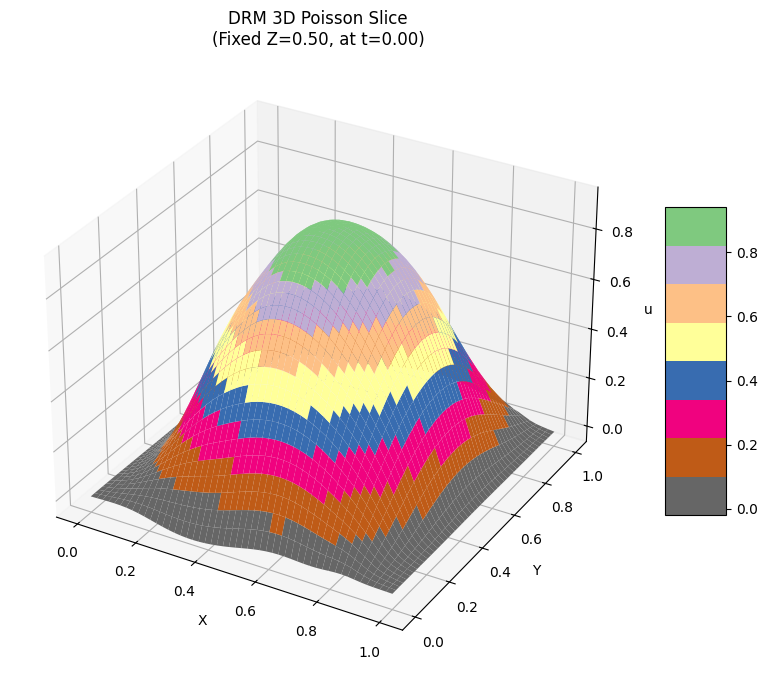

In [14]:
plot_3d_solution_slice(poisson_solver_3d, fixed_coord_dim=2, fixed_coord_val=Lz_3d / 2,
                           domain_bounds=domain_bounds_3d, title="DRM 3D Poisson Slice")

/Users/abhijithsai/PycharmProjects/deep_galerkin_impl/visualize.py:442: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])


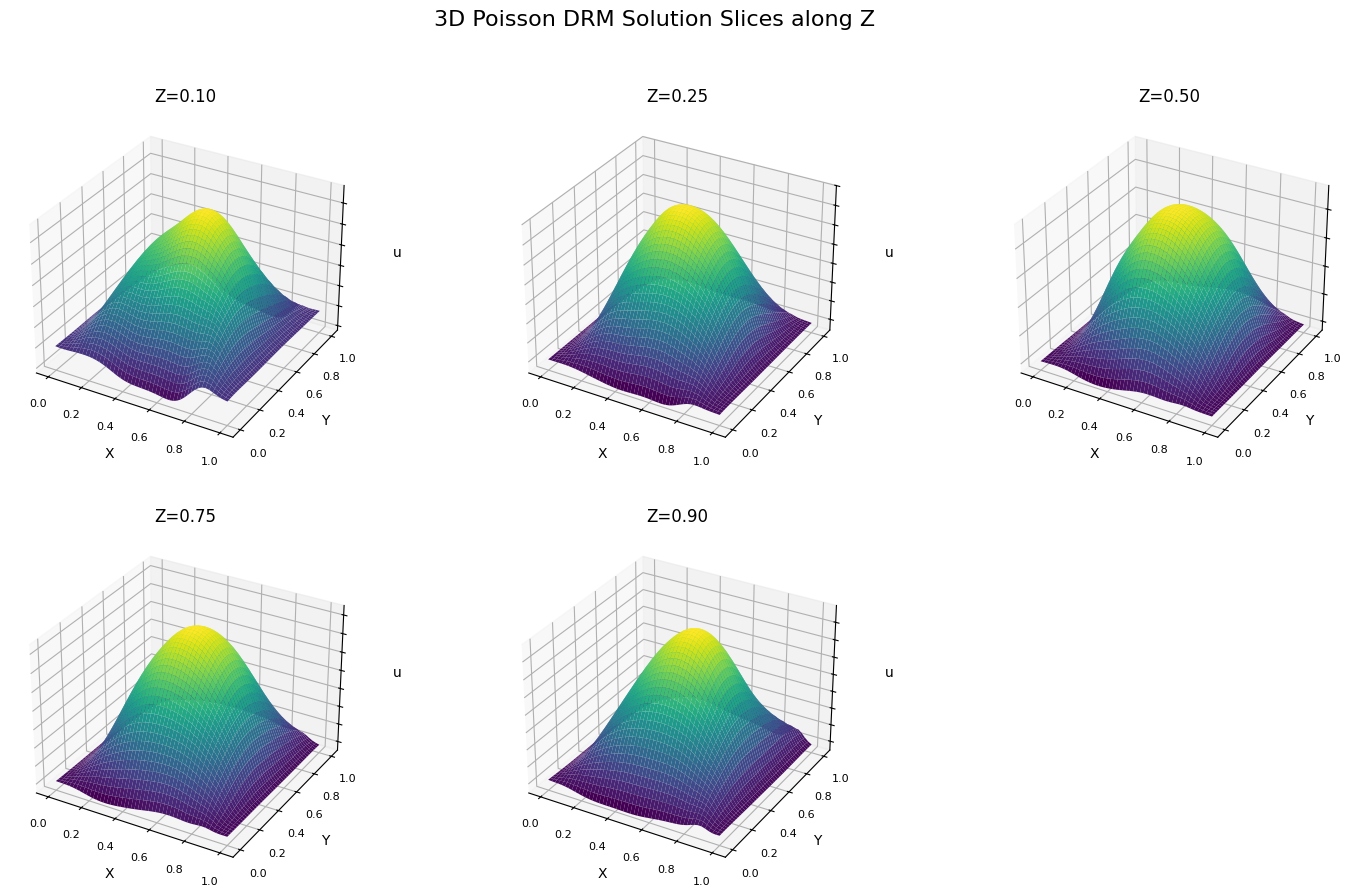

In [15]:
spatial_slices_3d_plot = [0.1, 0.25, 0.5, 0.75, 0.9]
plot_3d_solution_spatial_slices_subplots(poisson_solver_3d, fixed_coord_dim=2,
                                             fixed_coord_vals=spatial_slices_3d_plot,
                                             domain_bounds=domain_bounds_3d,
                                             plot_params={'main_title': "3D Poisson DRM Solution Slices along Z"})